In [39]:
import MDAnalysis as mda
atomistic_system = mda.Universe
from modules.distances import *
from modules.dssp import dssp
from modules.input import res_list
%reload_ext autoreload
%autoreload 2
import input

In [40]:
atomistic_system, reference_structure, energy_like_terms, is_aligned = input.read_files()
is_aligned = input.align_traj(is_aligned)

Aligned file found, reading this instead
Trajectory allready aligned, delete md250ns_center_po_aligned.xtc to rerun alignement


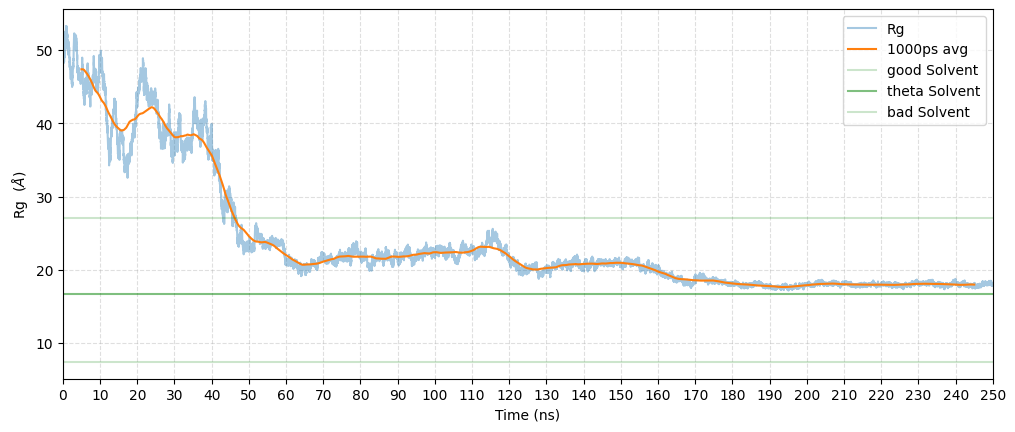

In [41]:
Rgyr = Rg(atomistic_system)

In [42]:
radius = np.array(Rgyr)
radius = radius.T

In [43]:
distances_3Darray = calculate_3D_distance(atomistic_system)

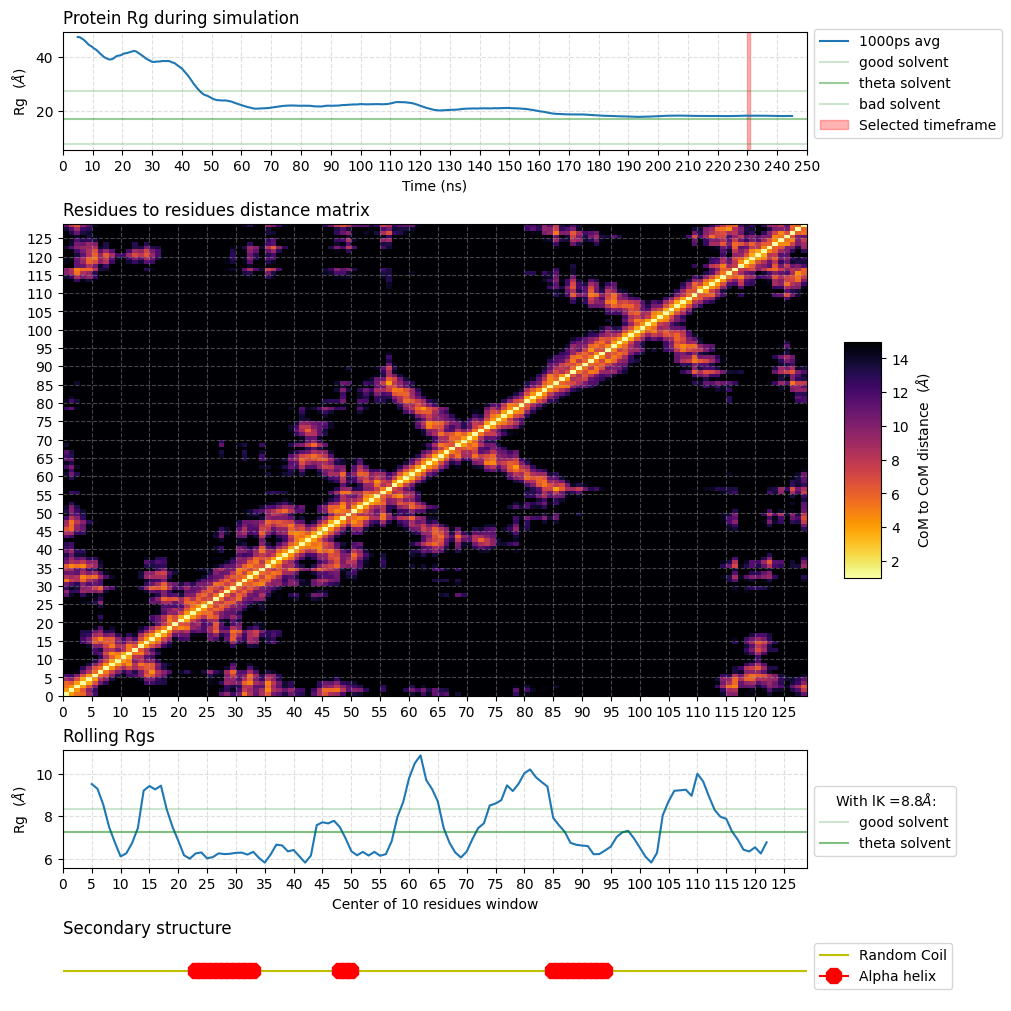

In [44]:
dist_max = 15
contact_start = 230
contact_finish = 231

atomistic_system.trajectory[0]
atomistic_system.trajectory[contact_start*100]
protein = atomistic_system.select_atoms("protein")
dsspline = dssp(protein)
Rg_start = 0
plot_distances_HD(Rgyr,  distances_3Darray, contact_start, contact_finish, dist_max, dsspline, Rg_start,
                  do_rolling_Rgs=True, residues_window=10, Khun_lengh=8.8,
                  atomistic_system=atomistic_system)
    
## Extras
#plot_distances_slices(distances_3Darray, contact_start, contact_finish, dist_max)
#mean = np.mean(distances_3Darray[contact_start *100 : contact_finish *100], axis=0)
#np.savetxt(f"{sim_path}distances_avg_{contact_start}ns-{contact_finish}ns.csv", mean, delimiter="," )
cutoff = 12
#plot_every_diagonal(distances_3Darray, contact_start,contact_finish, cutoff) ## it's pretty terrible don't look at it

In [45]:
#res_list(atomistic_system)
atomistic_system.trajectory[0]
protein = atomistic_system.select_atoms("protein")
dsspline_start = dssp(protein)

fasta = input.get_fasta(atomistic_system)

number_line = ""
for i in range(0,len(fasta),5):
    i = str(i)
    space = "-" * (5 - len(i))
    number_line = number_line + i + space
number_line = number_line[1:len(fasta)+1]


print(f"{number_line}\n{fasta}\n{dsspline_start}")

----5----10---15---20---25---30---35---40---45---50---55---60---65---70---75---80---85---90---95---100--105--110--115--120--125--
SSSAPARSSSASKKAVTPSRSALPSNWKQELESLRSSSPAPASSAPAPARSSSASWRDAAPASSAPARSSSSKKAVTPSRSALPSNWKQELESLRSSSPAPASSAPAPARSSSASWRDAAPAENLYFQS
---------------------------HHHHHHHH-----------------------------------------------------HHHHHHH------------------------E--E------


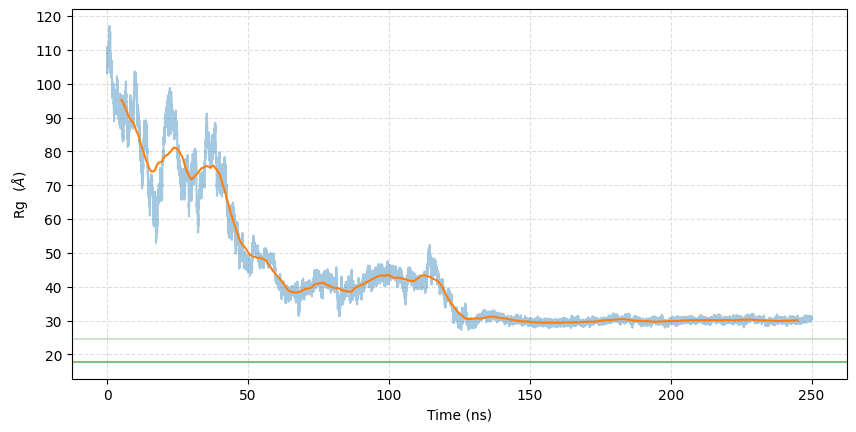

In [46]:
seleA = "resid 28 to 34"
seleB = "resid 88 to 94"

random_walk_steps = 90-30
Khun_lengh = 8.8
sele_distance(atomistic_system, seleA, seleB, random_walk_steps, Khun_lengh)